### Facial Expression Recognition

#### Import Modules

In [31]:
# IMPORT MODULES
# Import Numpy, TensorFlow, Keras
import numpy as np
from keras import layers
from keras.layers import Activation
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Lambda,ELU
from keras.optimizers import SGD,Adam,RMSprop
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

print('Import Modules')

Import Modules


#### Load Data

In [27]:
# LOAD DATA
# Load Training and Test Data
XTrainOrig,YTrainOrig,XTestOrig,YTestOrig,Classes=load_dataset()

# Normalize Image Vectors
XTrain=XTrainOrig/255.
XTest=XTestOrig/255.

# Reshape Labels
YTrain=YTrainOrig.T
YTest=YTestOrig.T

# Check Basic Data Properties
print ("Number of Training Examples: " + str(XTrain.shape[0]))
print ("Number of Test Examples: " + str(XTest.shape[0]))
print ("XTrain Shape: " + str(XTrain.shape))
print ("YTrain Shape: " + str(YTrain.shape))
print ("XTest Shape: " + str(XTest.shape))
print ("YTest Shape: " + str(YTest.shape))
print("Classes: ", Classes)
InputShape=XTrain.shape[1:]
print("Input Shape:",InputShape)

Number of Training Examples: 600
Number of Test Examples: 150
XTrain Shape: (600, 64, 64, 3)
YTrain Shape: (600, 1)
XTest Shape: (150, 64, 64, 3)
YTest Shape: (150, 1)
Classes:  [0 1]
Input Shape: (64, 64, 3)


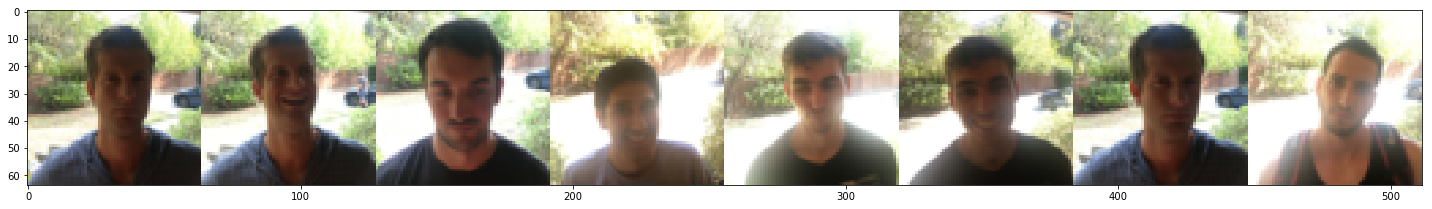

In [63]:
# LOAD DATA
# Show Training Images
ConcatImage=None
for i in range(8):
    Index=np.random.randint(XTrain.shape[0])
    if ConcatImage is None:
        ConcatImage=XTrain[Index]
    else:
        ConcatImage=np.concatenate([ConcatImage,XTrain[Index]],axis=1)
plt.figure(figsize=(25,10)) 
plt.imshow(ConcatImage)

#### CNN Model Architecture in Keras

In [108]:
# MODEL
# Set Epochs and Batch Size
Epochs=20
BatchSize=16

In [52]:
# MODEL
# Design the Model
print('Model Design!')

# Initiating the Model
ModelCNN=Sequential()

# Zero-Padding
ModelCNN.add(ZeroPadding2D((3,3),input_shape=InputShape))

# Convulutional Layer 
ModelCNN.add(Conv2D(32,(7,7),strides=(1,1)))

# Batch Normalization
ModelCNN.add(BatchNormalization(axis=3))

# RELU
ModelCNN.add(Activation('relu'))

# Max Pooling
ModelCNN.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer
ModelCNN.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))

# Batch Normalization
ModelCNN.add(BatchNormalization())

# RELU
ModelCNN.add(Activation('relu'))

# Convolutional Layer
ModelCNN.add(Conv2D(32,(3,3),strides=(1,1),padding="same"))

# Batch Normalization
ModelCNN.add(BatchNormalization())

# RELU
ModelCNN.add(Activation('relu'))

# Max Pooling
ModelCNN.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
ModelCNN.add(Flatten())

# Dense Layer
ModelCNN.add(Dense(128))

# Batch Normalization
ModelCNN.add(BatchNormalization())

# RELU
ModelCNN.add(Activation('relu'))

# Apply Dropout of 50%
ModelCNN.add(Dropout(0.5))

# Add Dense
ModelCNN.add(Dense(1, activation='sigmoid'))

# Print Model Summary
ModelCNN.summary()

Model Design!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_34 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128    

In [53]:
# MODEL
# Compile Model using Adam Optimizer and Loss Computed by Categorical Cross-Entropy
ModelCNN.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

#### Training and Evaluation

In [109]:
# TRAINING MODEL
# Train the Model
ModelCNN.fit(XTrain,YTrain,batch_size=BatchSize,epochs=Epochs,verbose=1,validation_data=(XTest,YTest))

# Evaluate the Model
Accuracy=ModelCNN.evaluate(x=XTest,y=YTest,batch_size=BatchSize)
print("Accuracy: ",Accuracy[1])

Train on 600 samples, validate on 150 samples
Epoch 1/20
600/600 [==============================] - 26s - loss: 0.0624 - acc: 0.9817 - val_loss: 0.1238 - val_acc: 0.9533
Epoch 2/20
600/600 [==============================] - 27s - loss: 0.0475 - acc: 0.9817 - val_loss: 0.2112 - val_acc: 0.9133
Epoch 3/20
600/600 [==============================] - 28s - loss: 0.0572 - acc: 0.9800 - val_loss: 0.5477 - val_acc: 0.7267
Epoch 4/20
600/600 [==============================] - 26s - loss: 0.0440 - acc: 0.9867 - val_loss: 0.1220 - val_acc: 0.9800
Epoch 5/20
600/600 [==============================] - 25s - loss: 0.0224 - acc: 0.9967 - val_loss: 0.1098 - val_acc: 0.9533
Epoch 6/20
600/600 [==============================] - 26s - loss: 0.0234 - acc: 0.9933 - val_loss: 0.0860 - val_acc: 0.9667
Epoch 7/20
600/600 [==============================] - 26s - loss: 0.0248 - acc: 0.9933 - val_loss: 0.0780 - val_acc: 0.9667
Epoch 8/20
600/600 [==============================] - 27s - loss: 0.0203 - acc: 0.9917

[[ 0.]]


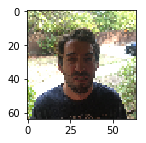

In [110]:
# EVALUATE
# Load Random Image
ImgPath='images/my_image.jpg'
Img=image.load_img(ImgPath,target_size=(64,64))
plt.figure(figsize=(2,2)) 
plt.imshow(Img)

# Preprocess
X=image.img_to_array(Img)
X=np.expand_dims(X,axis=0)
X=preprocess_input(X)

# Predict
print(ModelCNN.predict(X))

[[ 0.99921429]]
[[ 0.99742728]]
[[ 0.00063005]]
[[ 0.00127453]]
[[ 0.00084141]]
[[ 0.99763918]]
[[ 0.99649101]]
[[ 0.00100346]]


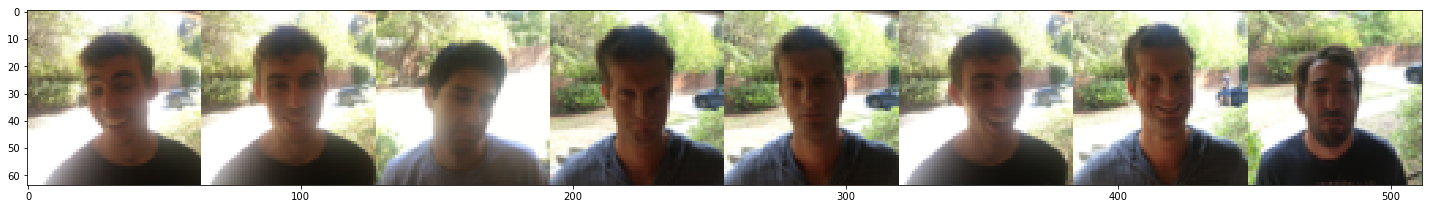

In [111]:
# EVALUATE
# Load Images and Predict Class
ConcatImg=None
for i in range(8):
    Index=np.random.randint(XTrain.shape[0])
    if ConcatImg is None:
        ConcatImg=XTrain[Index]
    else:
        ConcatImg=np.concatenate([ConcatImg,XTrain[Index]],axis=1)
    Img=XTrain[Index].reshape((1,64,64,3))
    print(ModelCNN.predict(Img))  
plt.figure(figsize=(25,10)) 
plt.imshow(ConcatImg)

#### Model Summary

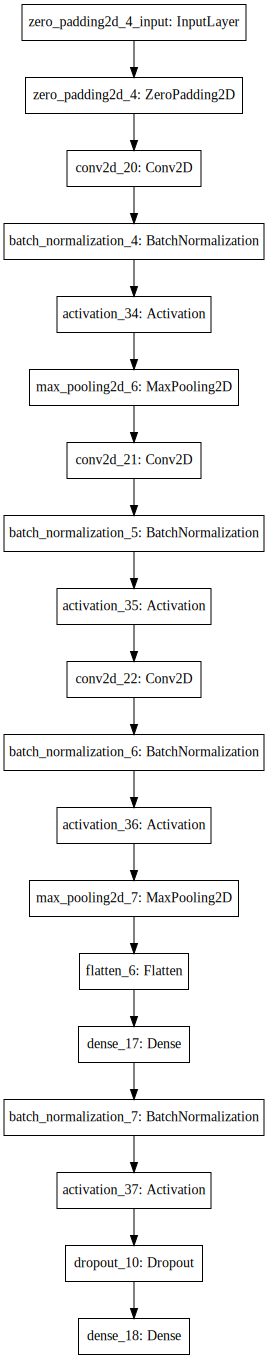

In [112]:
# MODEL SUMMARY
# Plot Model Summary
plot_model(ModelCNN,to_file='HappyModel.png')
SVG(model_to_dot(ModelCNN).create(prog='dot', format='svg'))